In [1]:
%matplotlib inline
# Enabling reloading extension to use external python files
%reload_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import os
from datetime import date, datetime,timedelta
import math
import columns
import datasets
import seasons
import directory_utils

In [3]:
# Setup matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')

In [4]:
data_frame = pd.read_csv(datasets.DAILY_ANALYSIS_DATA_SET_111_PATH, encoding=datasets.DEFAULT_CSV_ENCODING)

In [5]:
data_frame.shape

(7206, 18)

In [6]:
data_frame[columns.DATE] = pd.to_datetime(data_frame[columns.DATE])
data_frame = data_frame.set_index(columns.DATE)

In [7]:
min_amount_days_window = 15
window_delta_amount = math.ceil((min_amount_days_window / 2)-1)
window_delta = timedelta(days=window_delta_amount)
quantile_value = 0.9

def get_quantile(index, column):
    begin_date = index - window_delta
    end_date = index + window_delta
    data_window = data_frame.loc[begin_date:end_date]
    return data_window[column].quantile(quantile_value)

data_frame[columns.QUANTILE_MAX_TEMP_FIFTEEN_DAYS] = data_frame.index.map(lambda index: get_quantile(index, columns.MAX_TEMP))

data_frame[columns.QUANTILE_MIN_TEMP_FIFTEEN_DAYS] = data_frame.index.map(lambda index: get_quantile(index,columns.MIN_TEMP))

data_frame.head()

Ano  Mes  Dia  Dia Juliano  \
Data                                                     
1997-01-01 00:00:00+00:00  1997    1    1            1   
1997-01-02 00:00:00+00:00  1997    1    2            2   
1997-01-03 00:00:00+00:00  1997    1    3            3   
1997-01-04 00:00:00+00:00  1997    1    4            4   
1997-01-05 00:00:00+00:00  1997    1    5            5   

                          Estacao Metereologica do Ano  \
Data                                                     
1997-01-01 00:00:00+00:00                       Summer   
1997-01-02 00:00:00+00:00                       Summer   
1997-01-03 00:00:00+00:00                       Summer   
1997-01-04 00:00:00+00:00                       Summer   
1997-01-05 00:00:00+00:00                       Summer   

                           Temperatura do Ar Media (degC)  \
Data                                                        
1997-01-01 00:00:00+00:00                       22.875903   
1997-01-02 00:00:00+00:00                       21.545625   
1997-01-03 00:00:00+00:00                       20.179444   
1997-01-04 00:00:00+00:00                       22.125833   
1997-01-05 00:00:00+00:00                       23.178958   

                           Temperatura do Ar Maxima (degC)  \
Data                                                         
1997-01-01 00:00:00+00:00                            29.39   
1997-01-02 00:00:00+00:00                            25.93   
1997-01-03 00:00:00+00:00                            25.17   
1997-01-04 00:00:00+00:00                            29.21   
1997-01-05 00:00:00+00:00                            30.46   

                           Temperatura do Ar Minima (degC)  \
Data                                                         
1997-01-01 00:00:00+00:00                            18.53   
1997-01-02 00:00:00+00:00                            19.21   
1997-01-03 00:00:00+00:00                            17.88   
1997-01-04 00:00:00+00:00                            17.85   
1997-01-05 00:00:00+00:00                            18.06   

                           Variacao da Temperatura do Ar (degC)  \
Data                                                              
1997-01-01 00:00:00+00:00                                 10.86   
1997-01-02 00:00:00+00:00                                  6.72   
1997-01-03 00:00:00+00:00                                  7.29   
1997-01-04 00:00:00+00:00                                 11.36   
1997-01-05 00:00:00+00:00                                 12.40   

                           Umidade relativa Media (%)  \
Data                                                    
1997-01-01 00:00:00+00:00                   80.237222   
1997-01-02 00:00:00+00:00                   79.303194   
1997-01-03 00:00:00+00:00                   82.070000   
1997-01-04 00:00:00+00:00                   83.748333   
1997-01-05 00:00:00+00:00                   84.473542   

                           Umidade relativa Maxima (%)  \
Data                                                     
1997-01-01 00:00:00+00:00                         98.1   
1997-01-02 00:00:00+00:00                         88.7   
1997-01-03 00:00:00+00:00                         95.0   
1997-01-04 00:00:00+00:00                        100.0   
1997-01-05 00:00:00+00:00                        100.0   

                           Umidade relativa Minima (%)  \
Data                                                     
1997-01-01 00:00:00+00:00                        58.77   
1997-01-02 00:00:00+00:00                        66.41   
1997-01-03 00:00:00+00:00                        67.79   
1997-01-04 00:00:00+00:00                        56.78   
1997-01-05 00:00:00+00:00                        57.30   

                           Variacao da Umidade relativa (%)  Pressao (hPa)  \
Data                                                                         
1997-01-01 00:00:00+00:00                             39.33     942.916667  

In [8]:
# Reordering columns
_ORDER = [
    columns.YEAR,
    columns.MONTH,
    columns.DAY,
    columns.DAY_OF_YEAR,
    columns.SEASON,
    columns.TEMPERATURE, 
    columns.MAX_TEMP, 
    columns.MIN_TEMP, 
    columns.VARIATION_TEMP,
    columns.QUANTILE_MAX_TEMP_FIFTEEN_DAYS,
    columns.QUANTILE_MIN_TEMP_FIFTEEN_DAYS,
    columns.HUMIDITY, 
    columns.MAX_HUMIDITY,
    columns.MIN_HUMIDITY,
    columns.VARIATION_HUMIDITY,
    columns.PRESSURE,
    columns.MAX_PRESSURE,
    columns.MIN_PRESSURE,
    columns.VARIATION_PRESSURE
]
data_frame = data_frame[_ORDER]

In [9]:
directory_utils.create_if_doesnt_exist(datasets.GEIRINHAS_DIRECTORY_PATH)
data_frame.to_csv(datasets.GEIRINHAS_DATA_SET_111_PATH , index = True, encoding=datasets.DEFAULT_CSV_ENCODING)

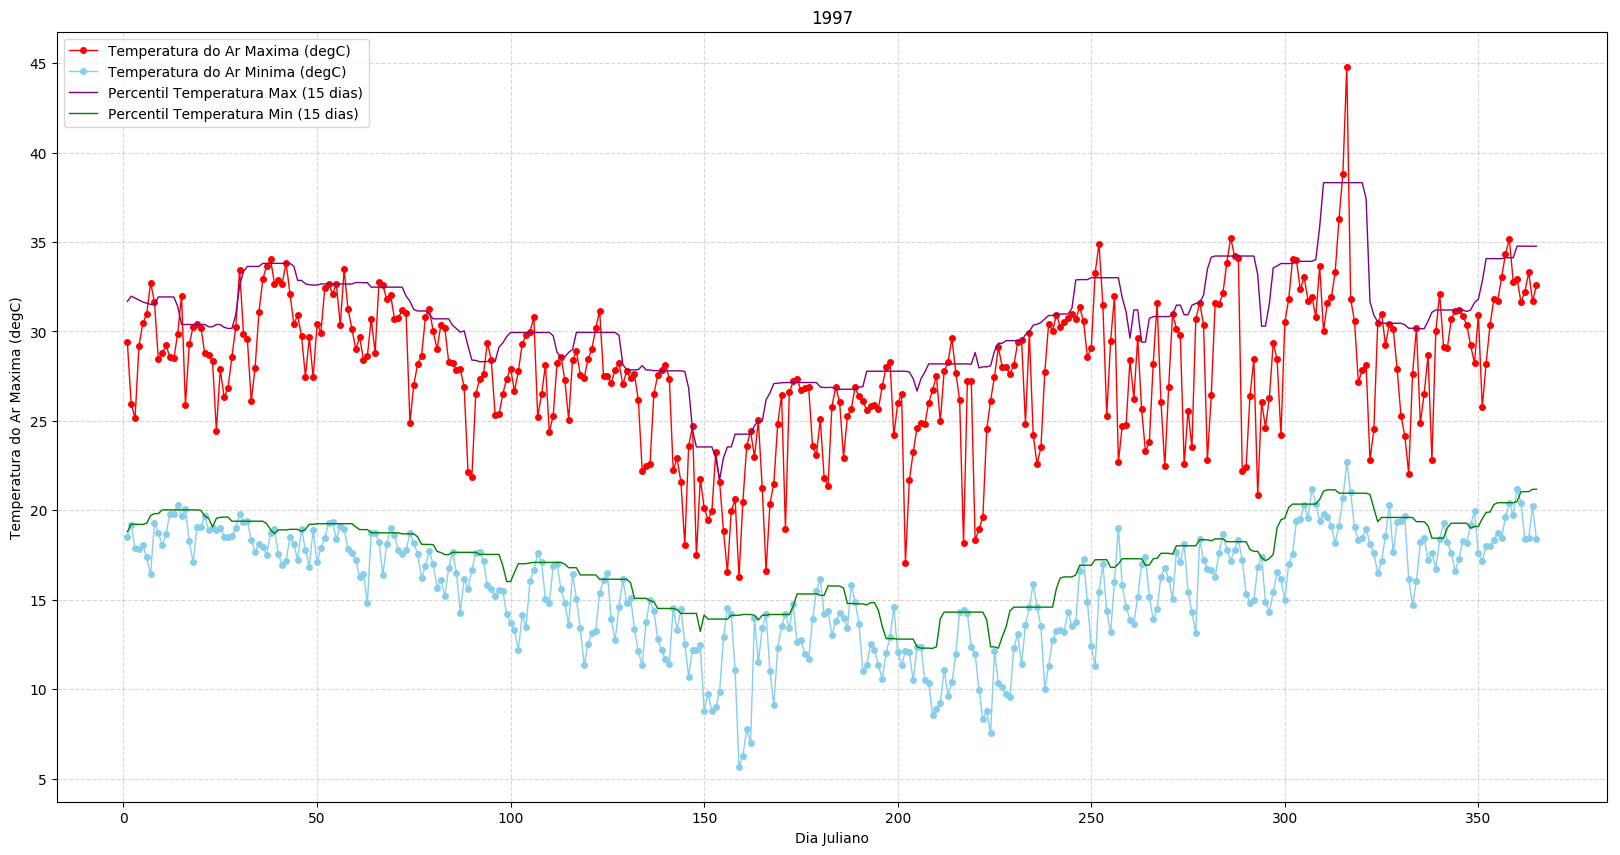

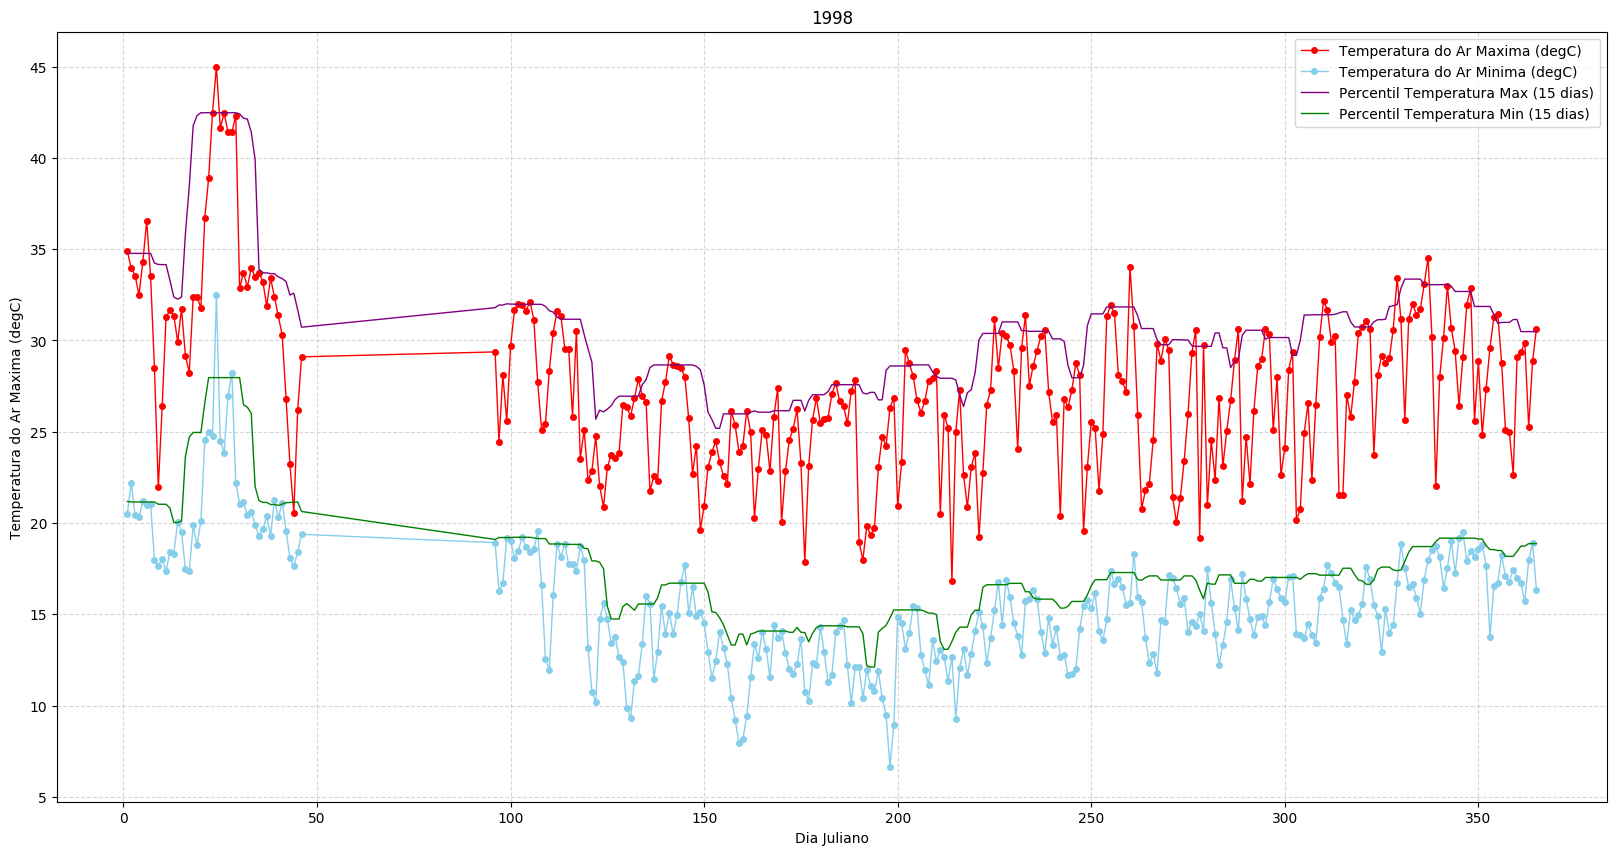

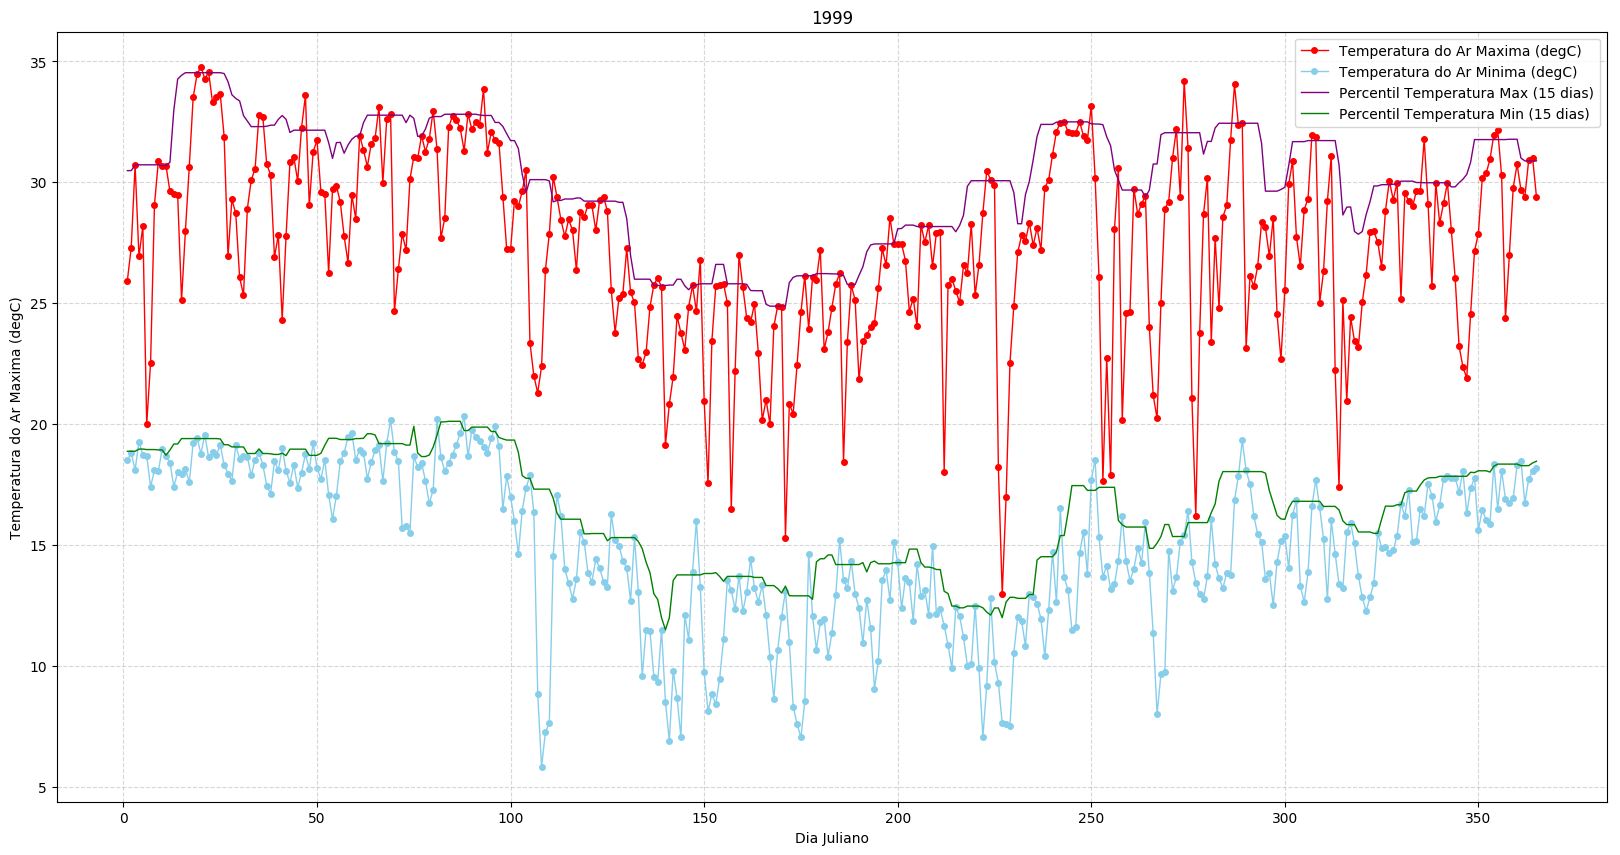

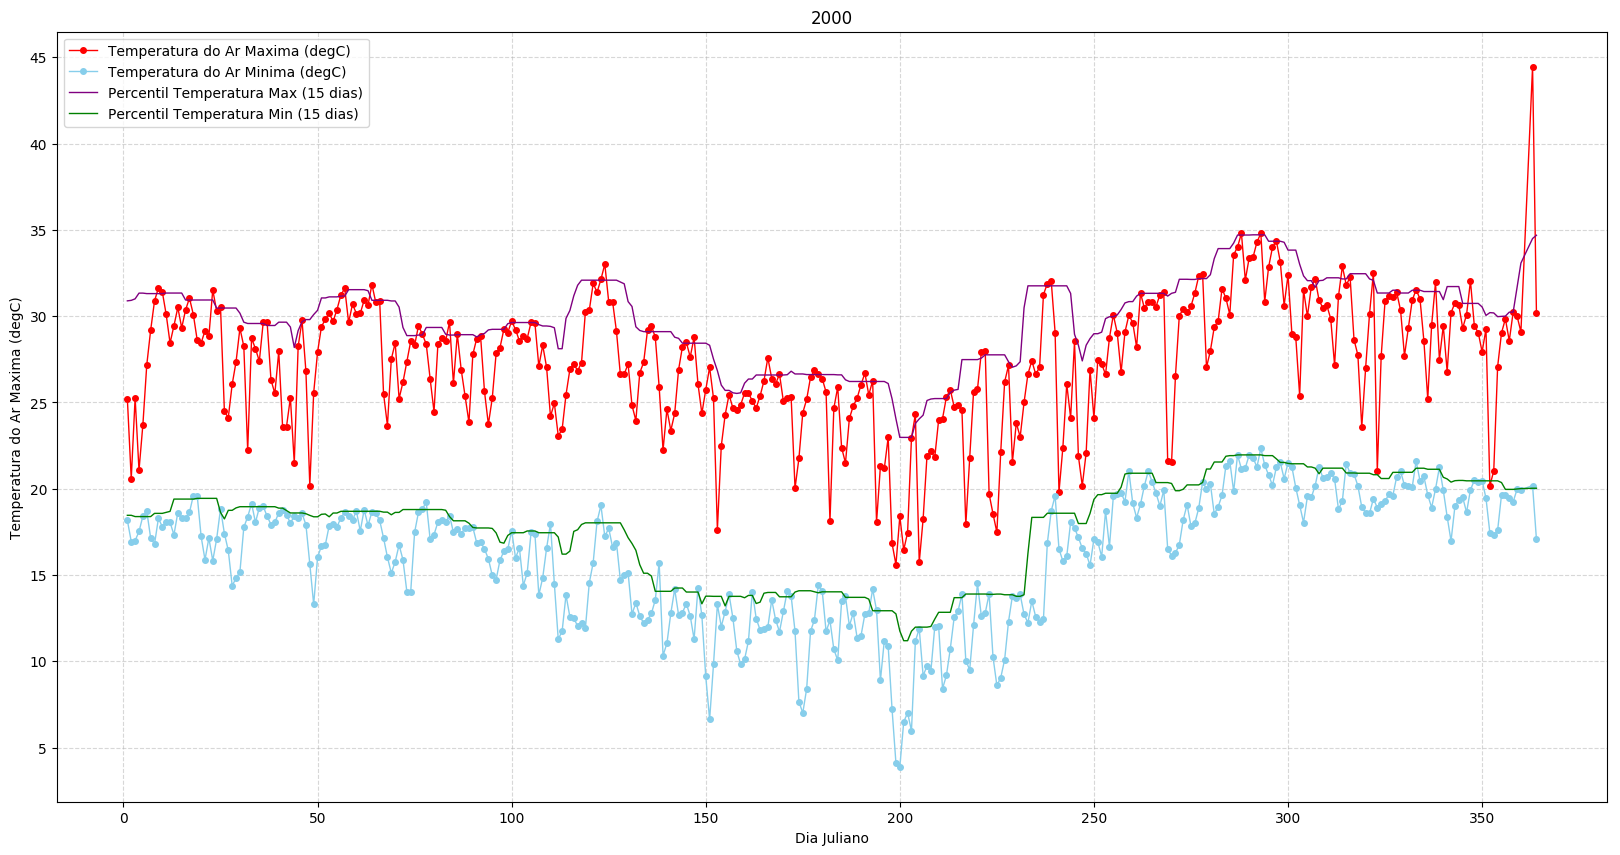

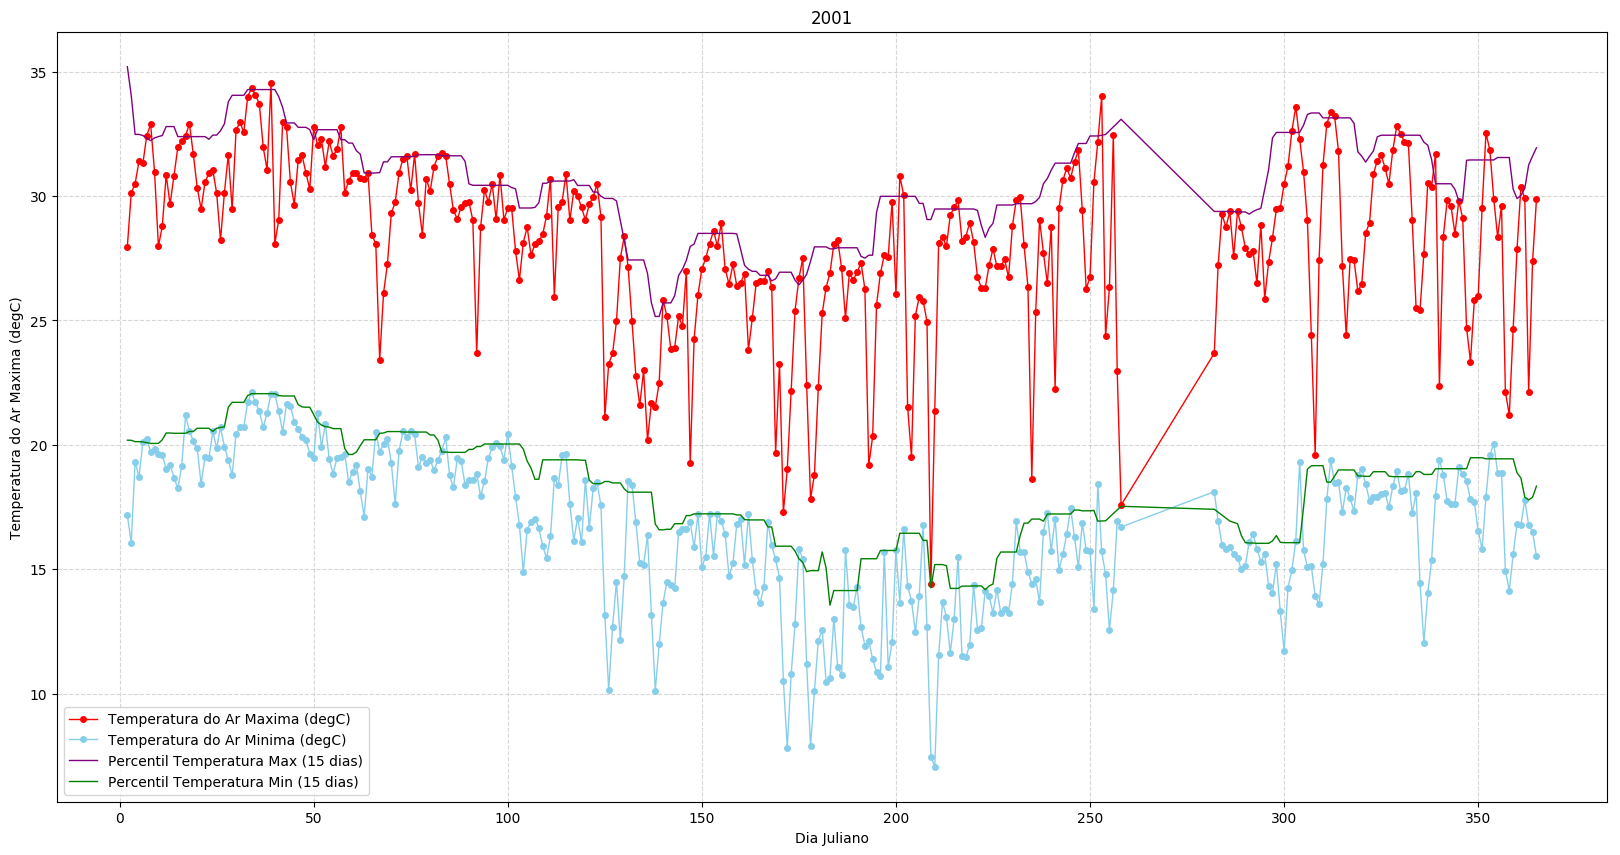

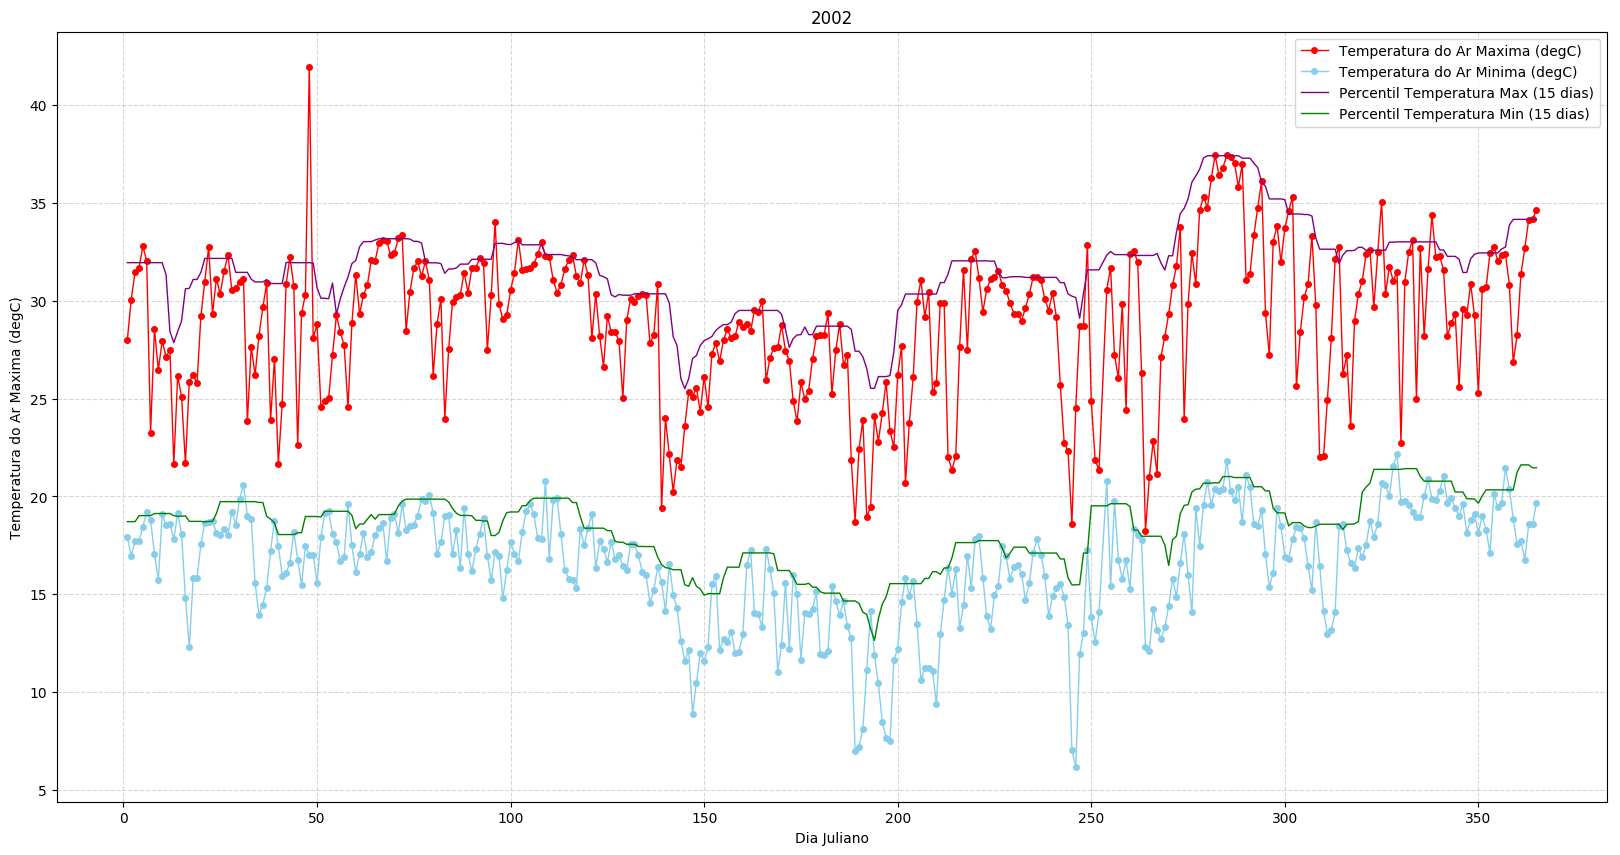

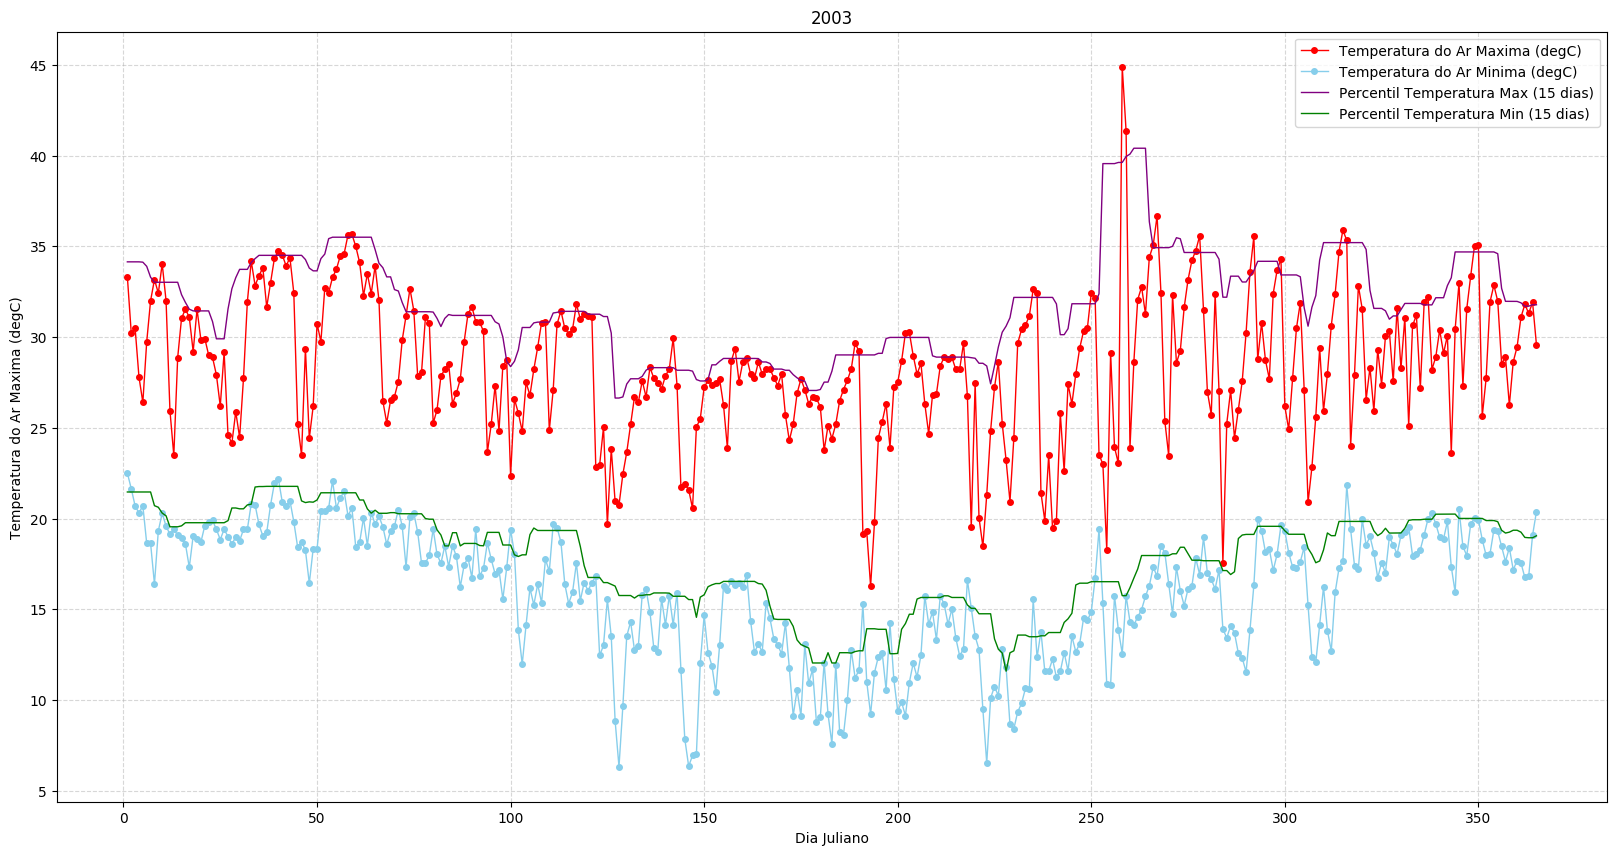

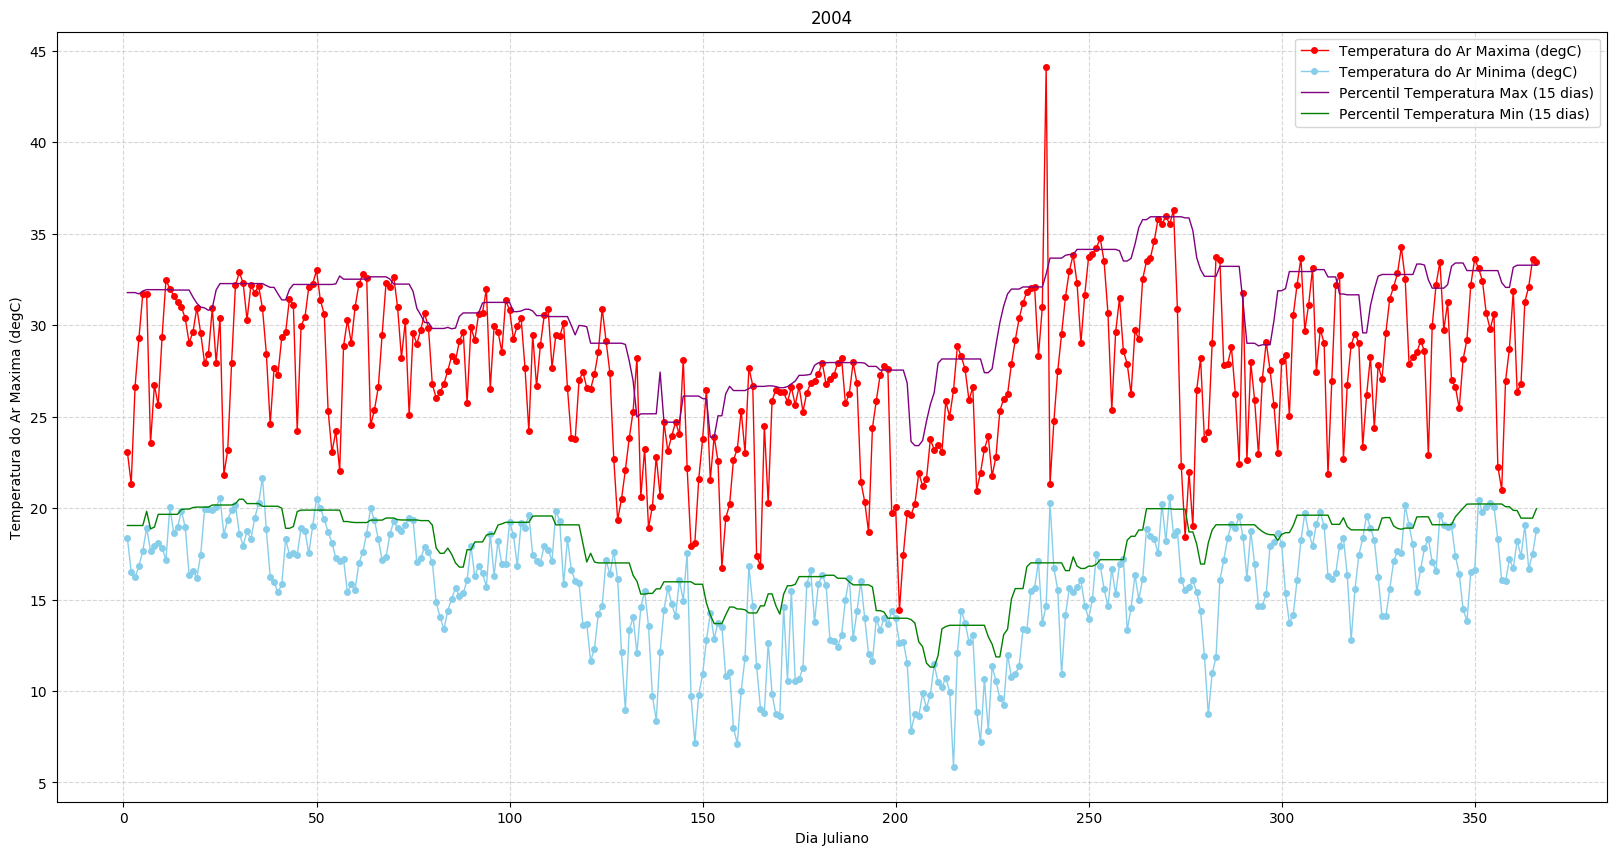

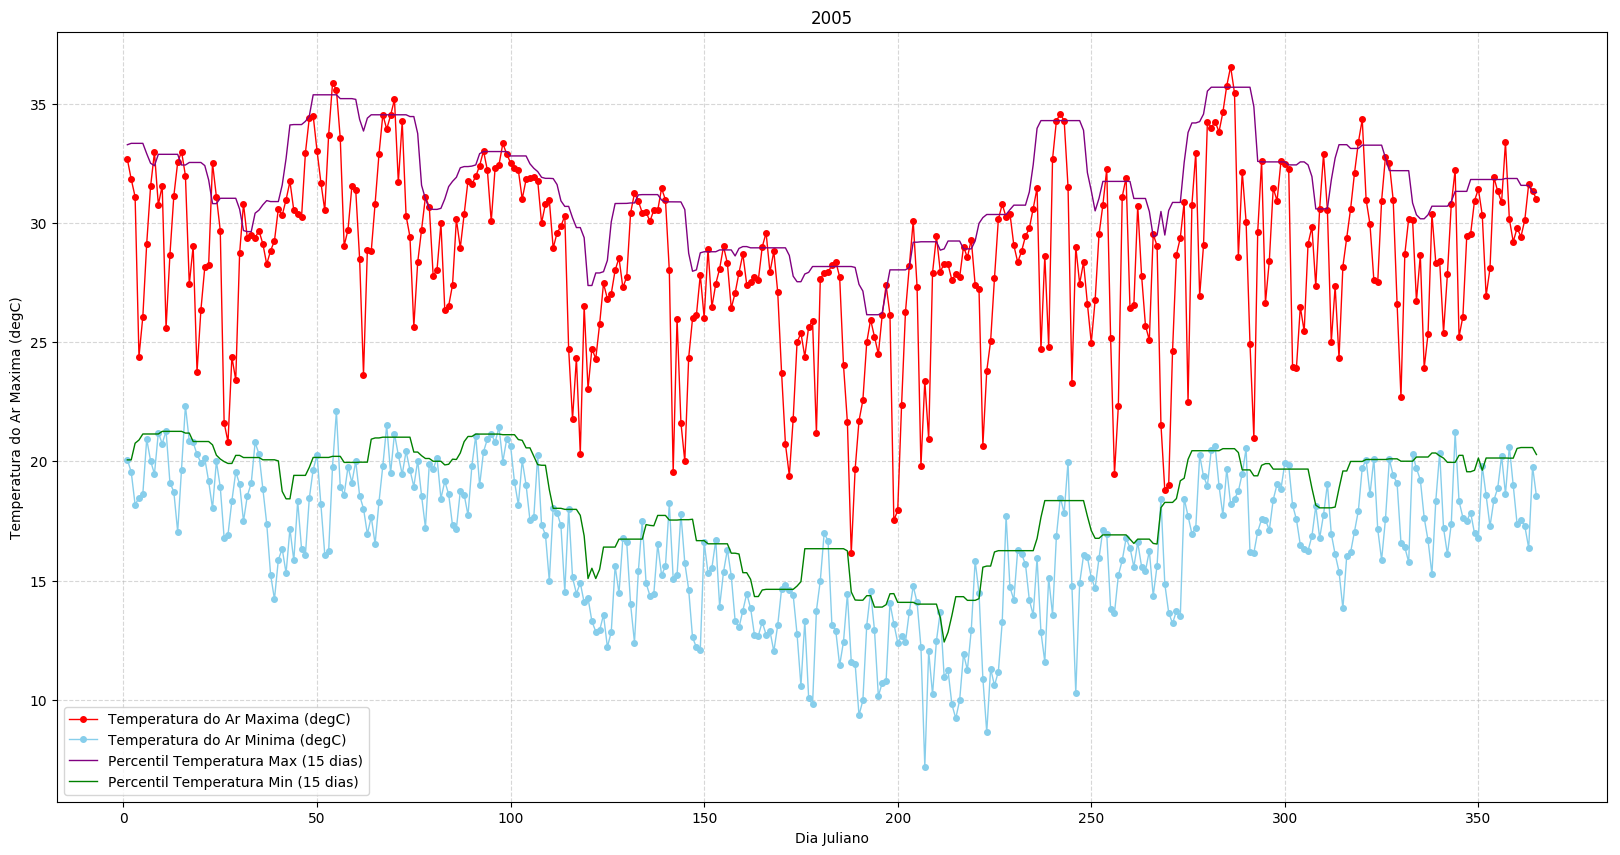

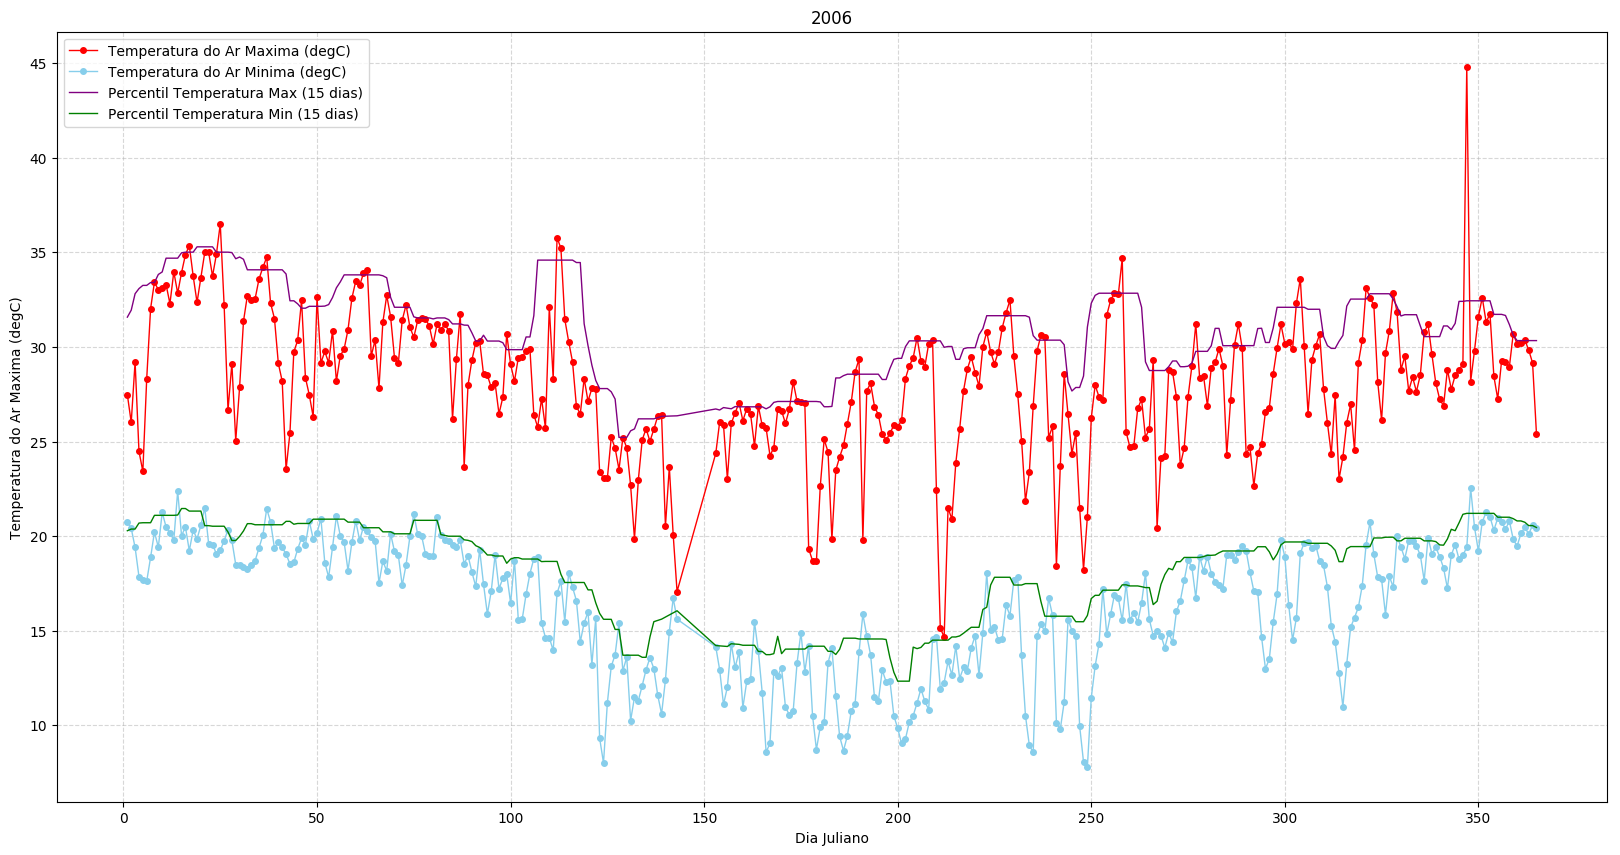

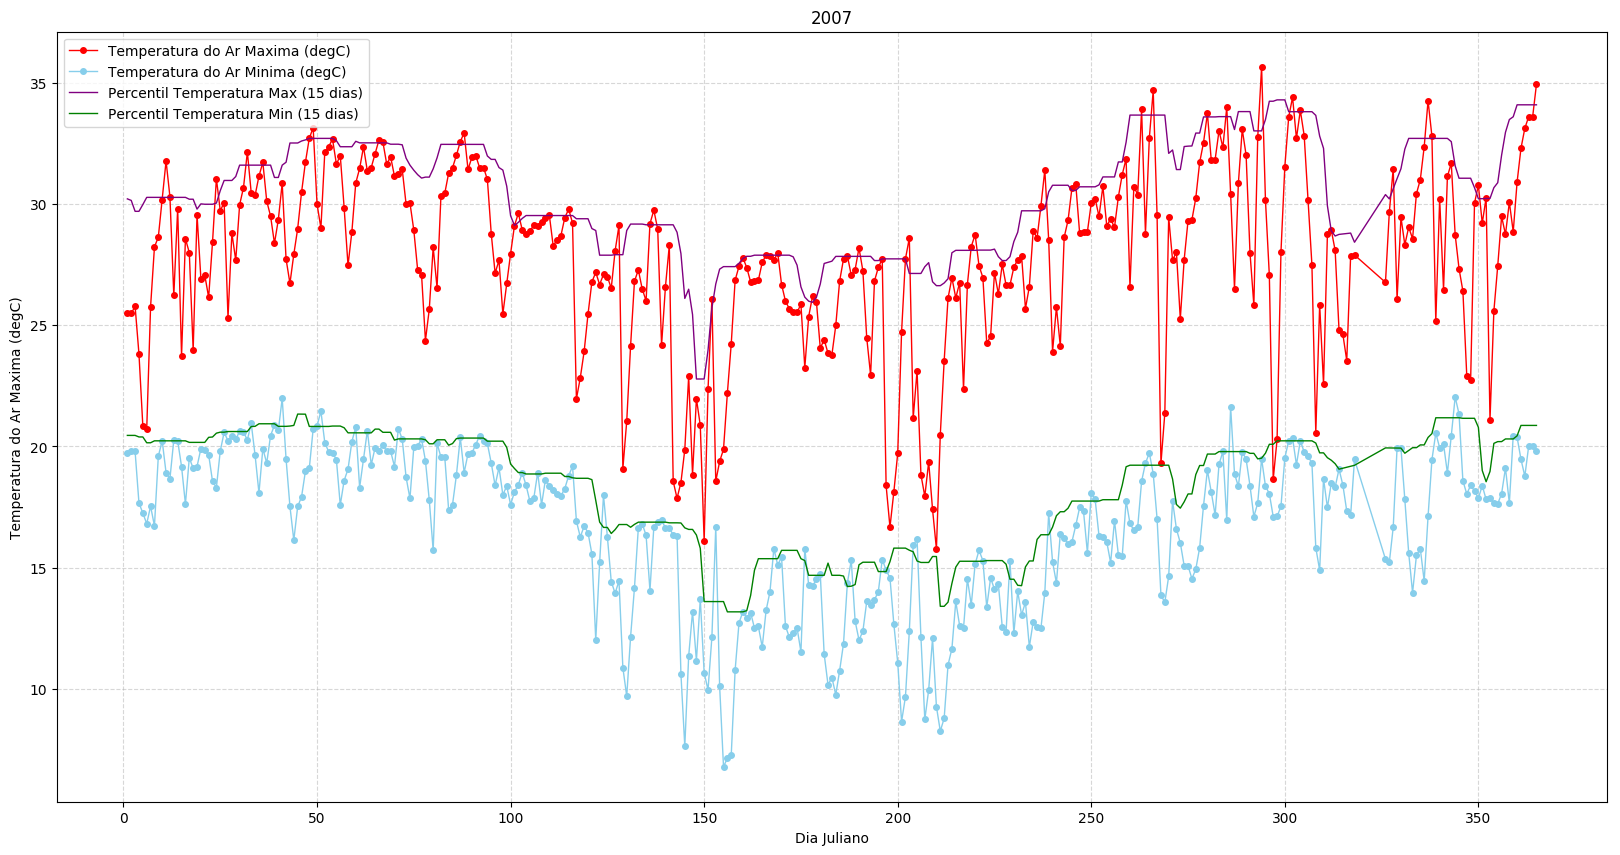

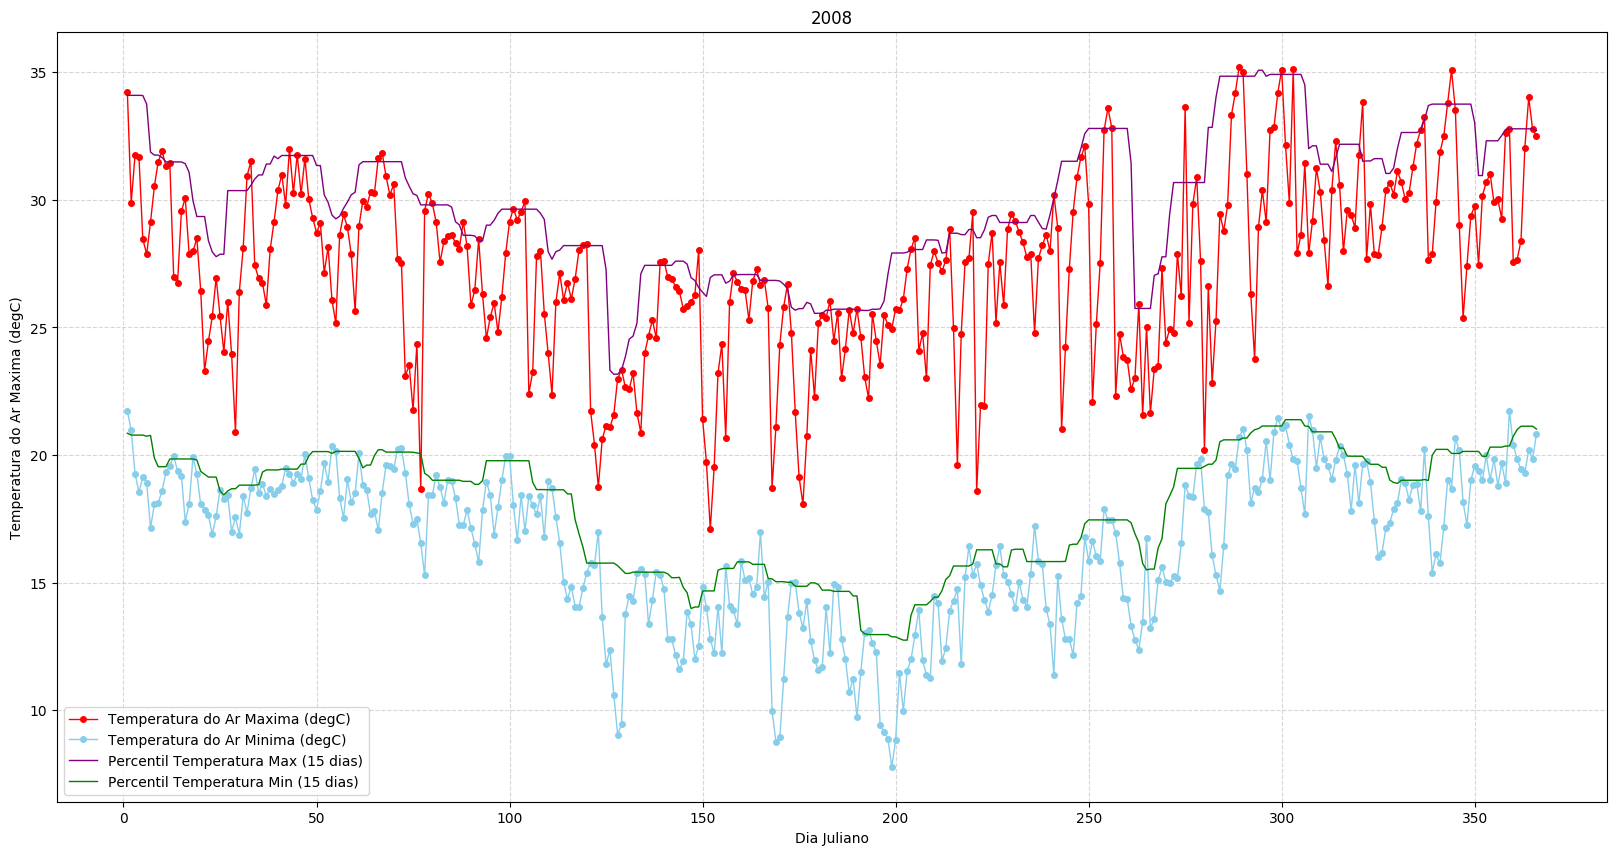

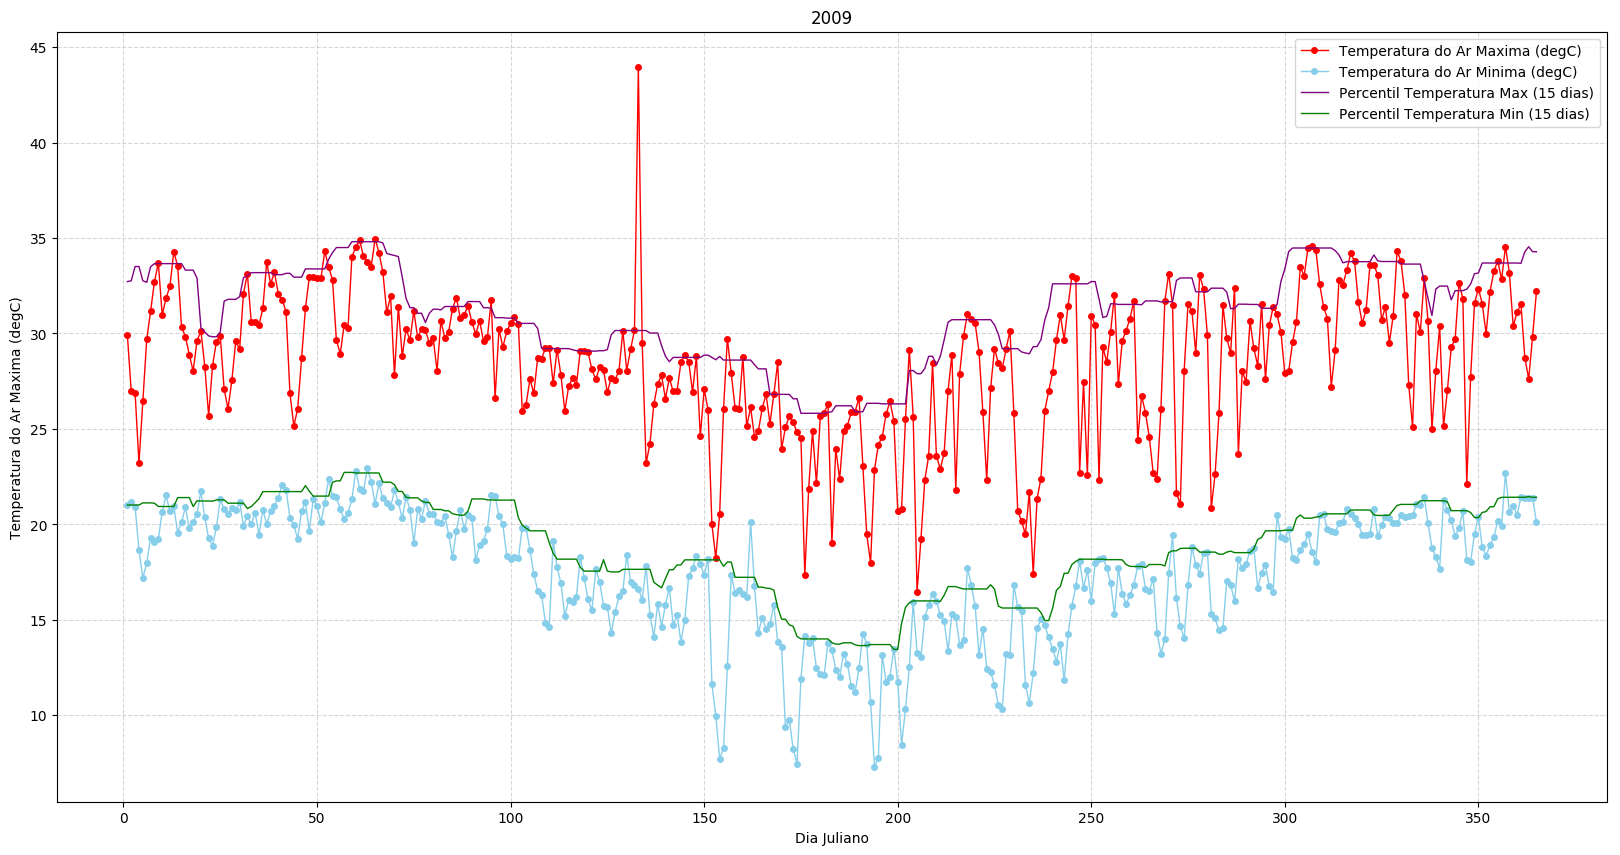

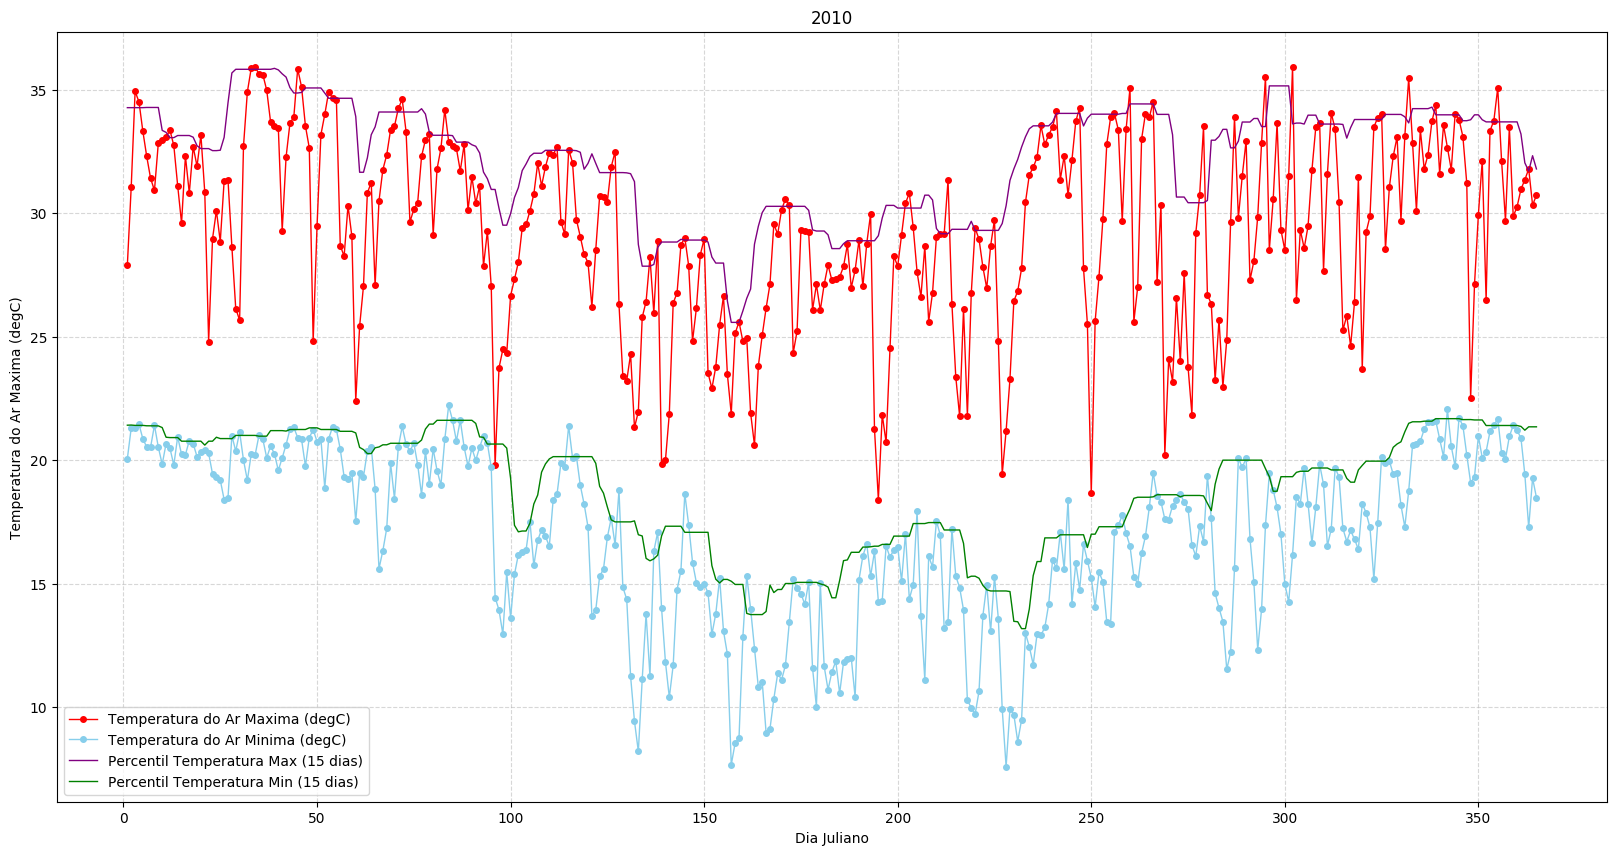

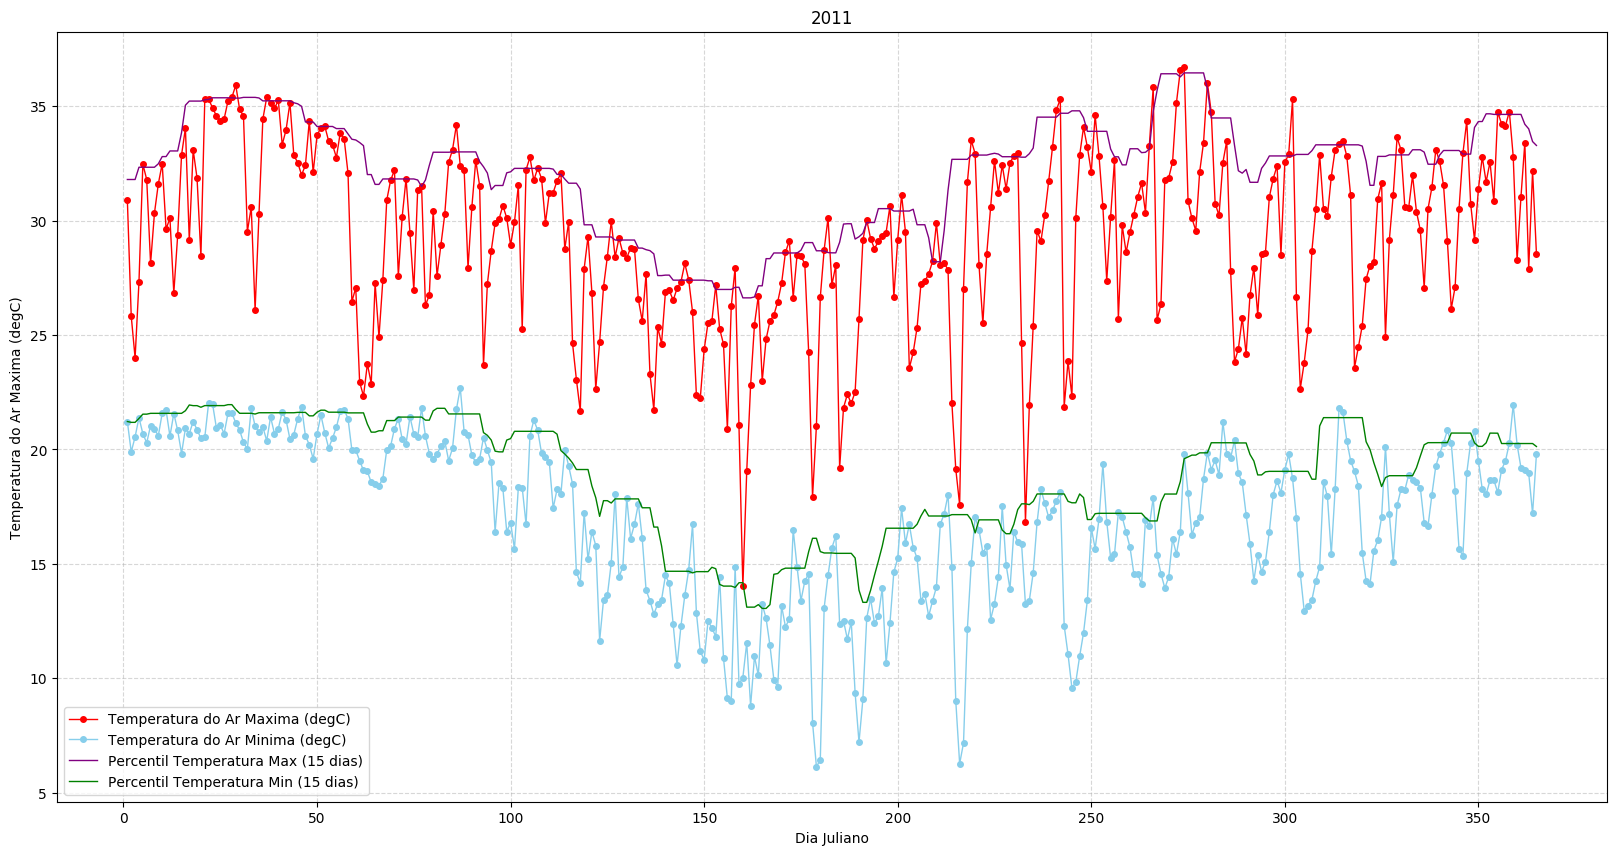

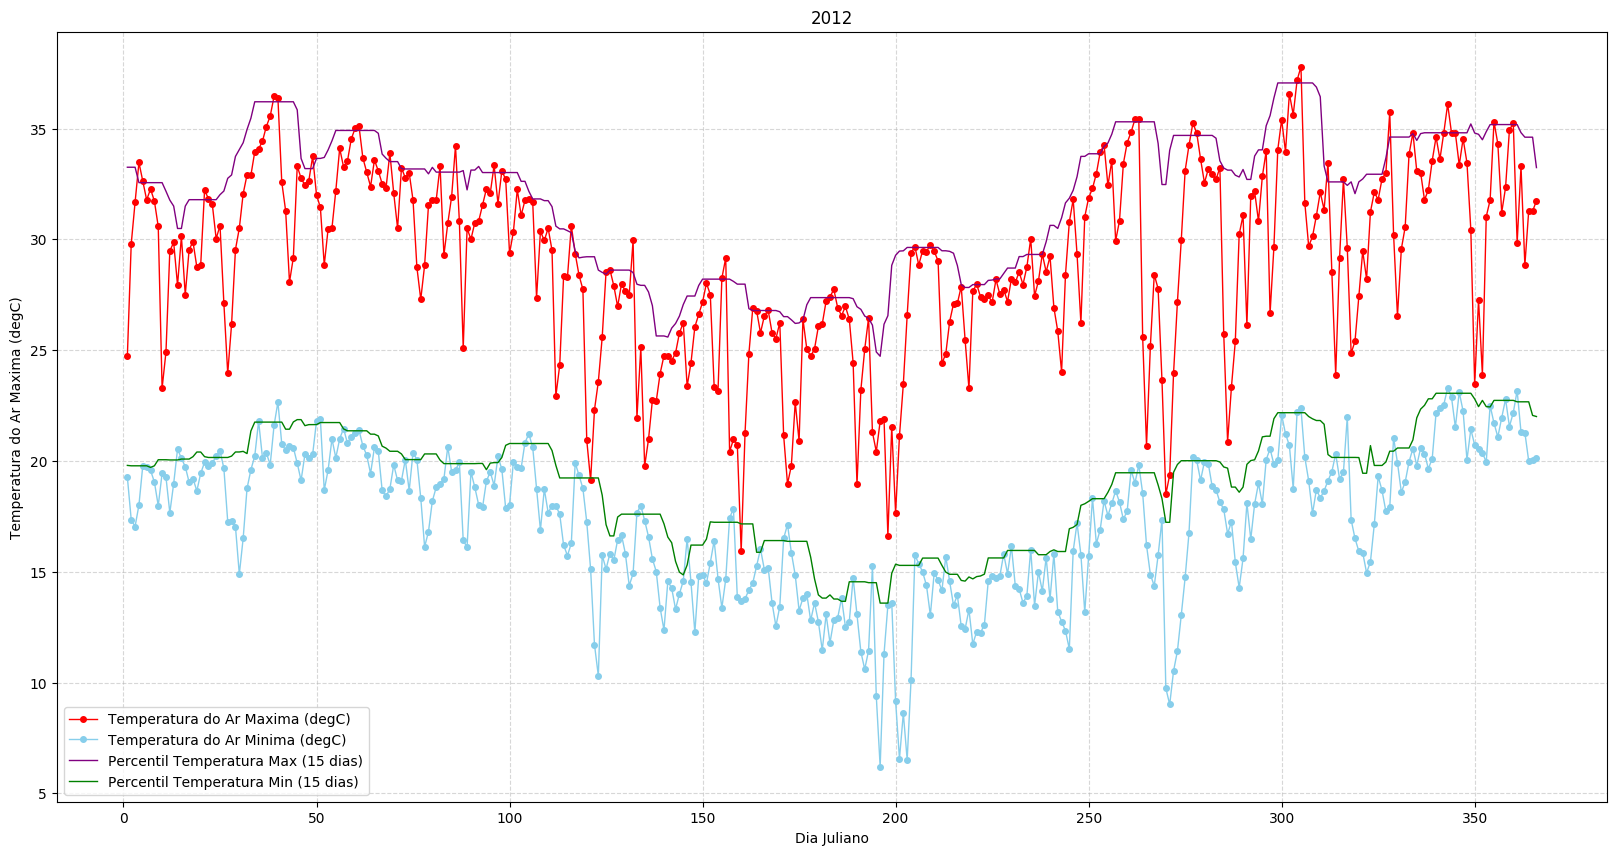

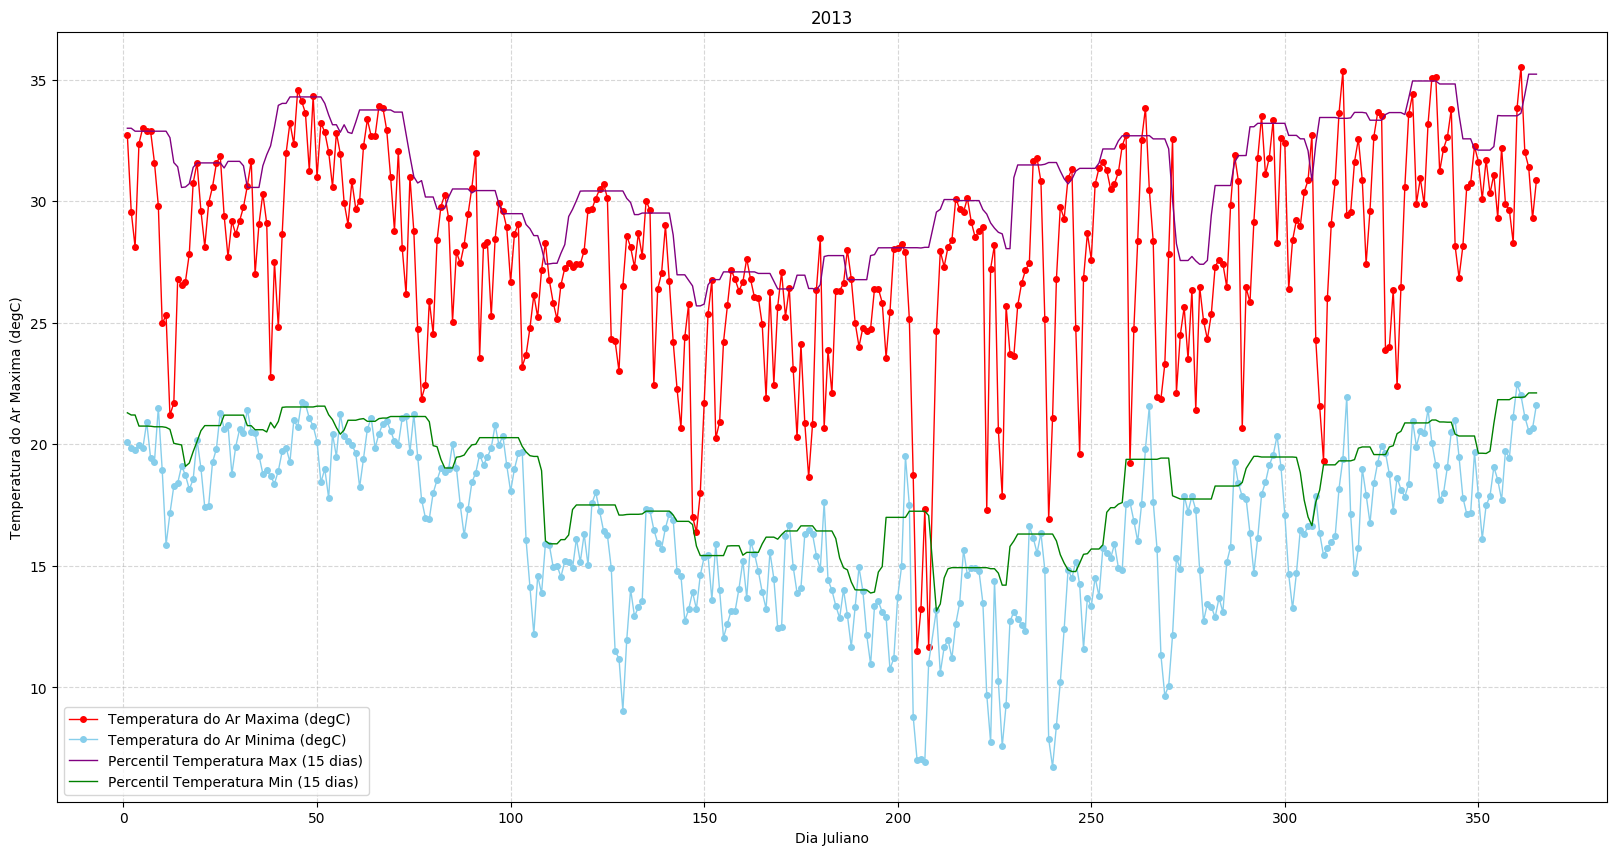

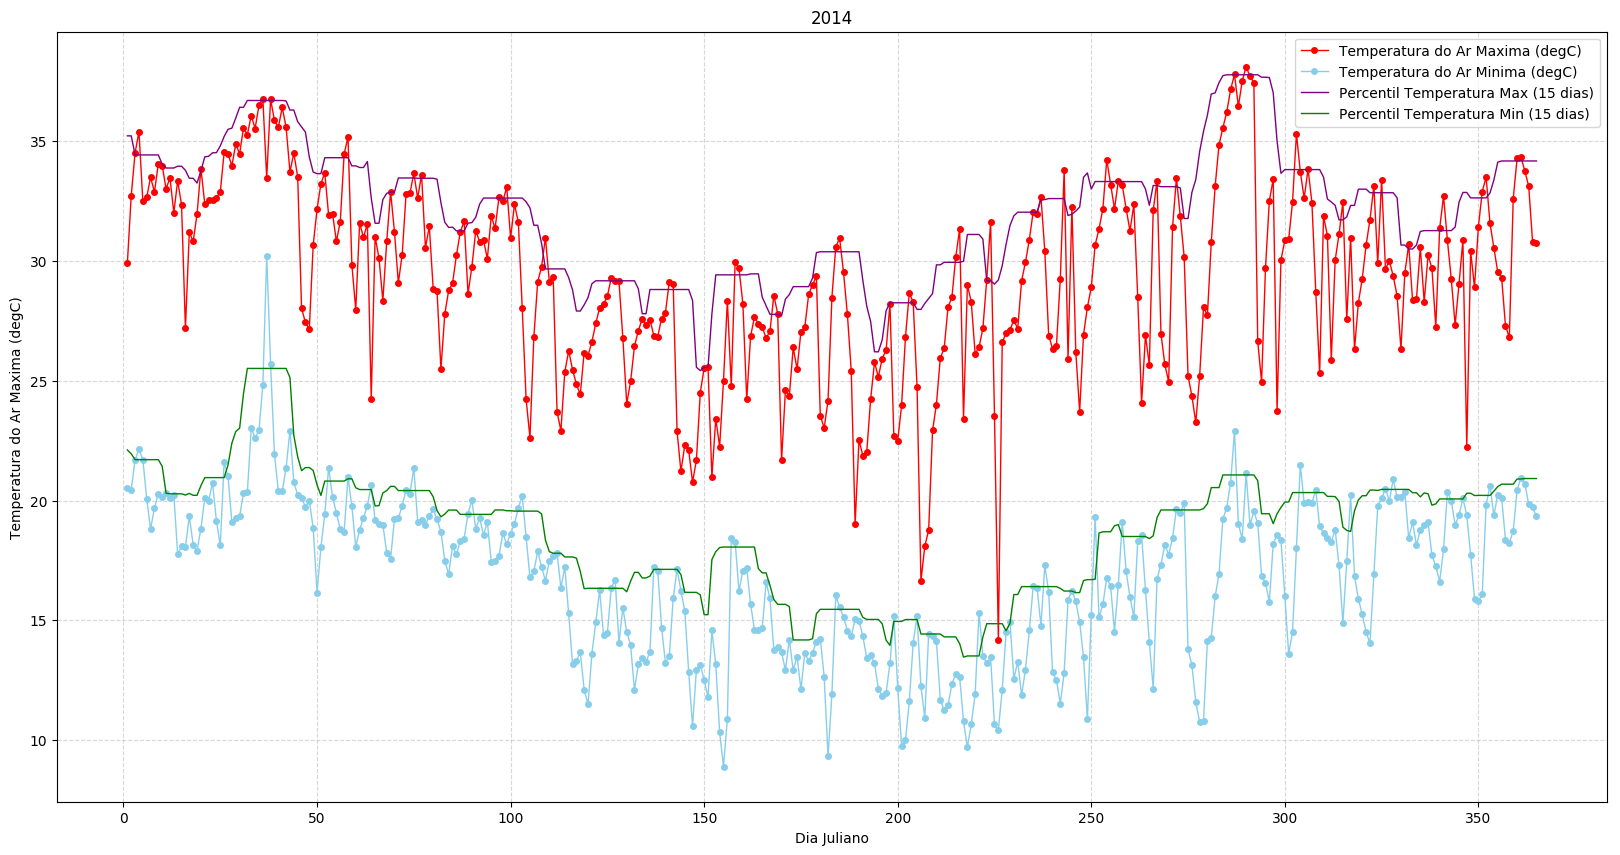

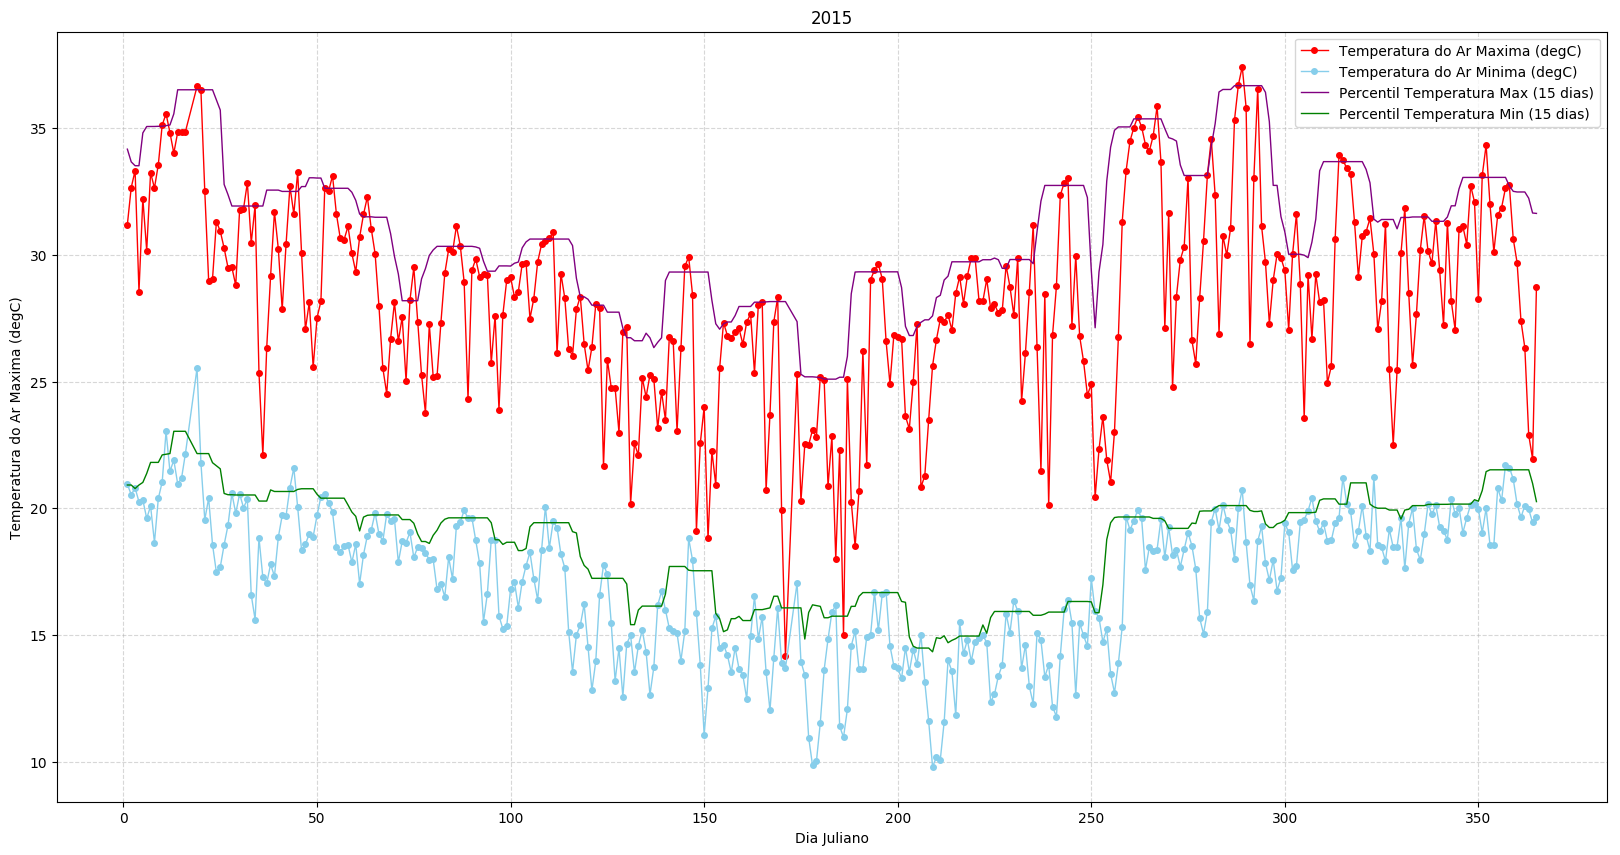

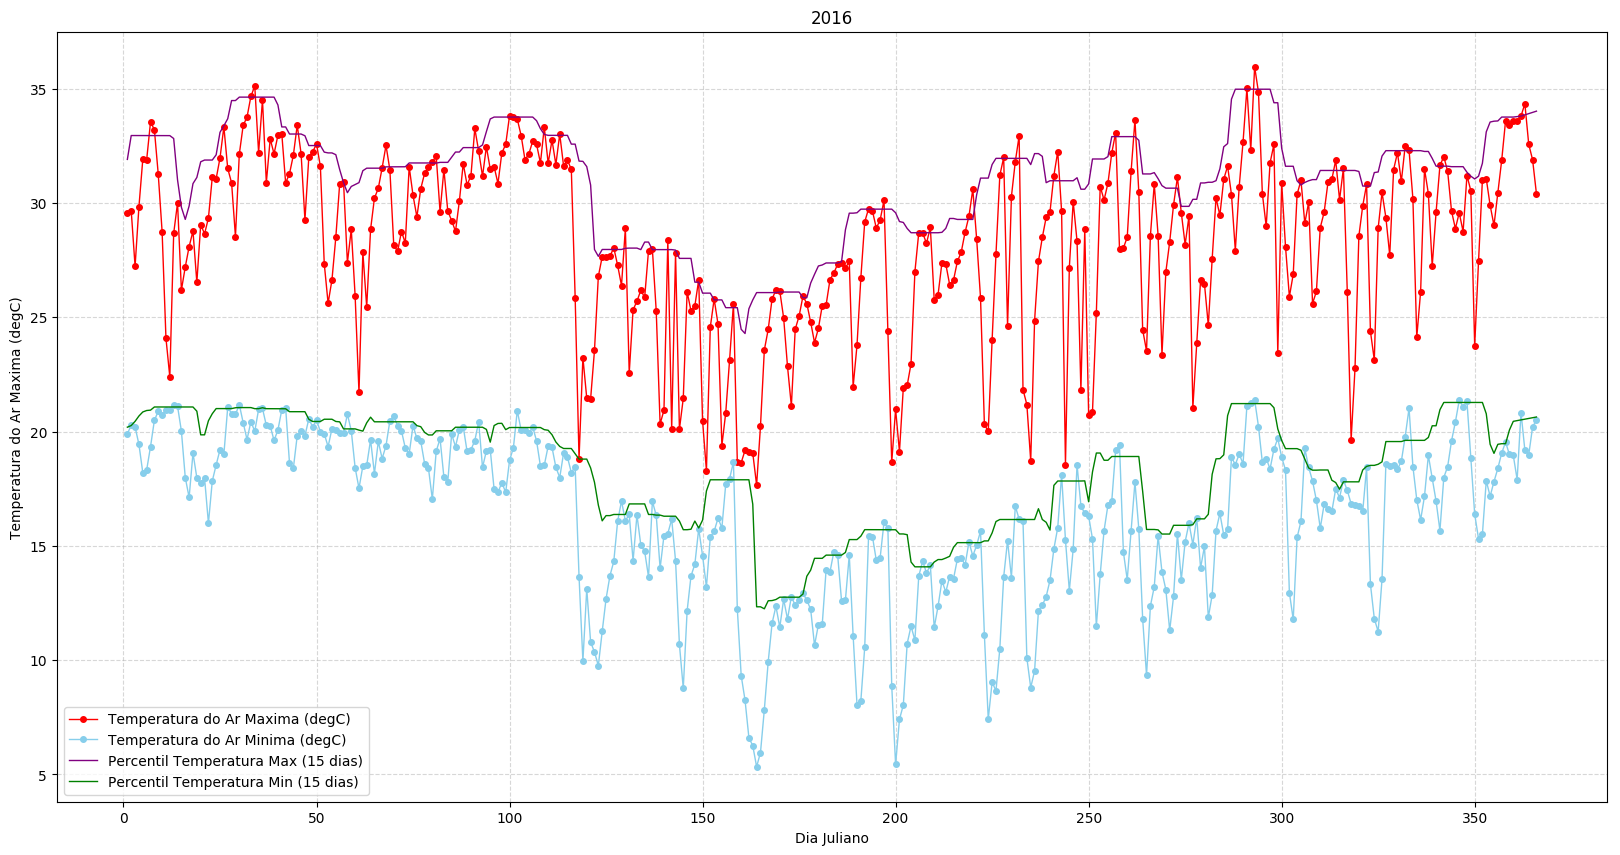

In [10]:
min_x_value = data_frame[columns.MAX_TEMP].min() - 5
max_x_value = data_frame[columns.MAX_TEMP].max() + 5

min_y_value = data_frame[columns.DAY_OF_YEAR].min() - 5
max_y_value = data_frame[columns.DAY_OF_YEAR].max() + 5

for i in data_frame[columns.YEAR].unique():
    data_2plot = data_frame[(data_frame[columns.YEAR] == i)]
#     data_2plot = data_2plot[data_2plot[_DAY_OF_YEAR_COLUMN]>=200]
#     data_2plot = data_2plot[data_2plot[_DAY_OF_YEAR_COLUMN]<=250]
    
    plt.figure(figsize=(20,10))
    plt.title(str(i))    
    plt.plot(columns.DAY_OF_YEAR, columns.MAX_TEMP, data=data_2plot, color='red', linewidth=1,marker='o', markerfacecolor='red', markersize=4)
    plt.plot(columns.DAY_OF_YEAR, columns.MIN_TEMP, data=data_2plot, color='skyblue', linewidth=1,marker='o', markerfacecolor='skyblue', markersize=4)
    plt.plot(columns.DAY_OF_YEAR, columns.QUANTILE_MAX_TEMP_FIFTEEN_DAYS, data=data_2plot, color='purple', linewidth=1)
    plt.plot(columns.DAY_OF_YEAR, columns.QUANTILE_MIN_TEMP_FIFTEEN_DAYS, data=data_2plot, color='green', linewidth=1)
    plt.legend()
    plt.xlabel(columns.DAY_OF_YEAR)
    plt.ylabel(columns.MAX_TEMP)
    plt.grid(True, linestyle='--', alpha = 0.5)
    plt.show()

In [11]:
def is_above_quantiles(index):
    row = data_frame.loc[index:index]
    is_max_over_quantile = row[columns.MAX_TEMP] >= row[columns.QUANTILE_MAX_TEMP_FIFTEEN_DAYS]
    is_min_over_quantile = row[columns.MIN_TEMP] >= row[columns.QUANTILE_MIN_TEMP_FIFTEEN_DAYS]
    return is_max_over_quantile.values[0] and is_min_over_quantile.values[0]